This is a basic example that shows the approach that shall be taken to solve Linear Regression Problems in Python. Useful boxplot and scatter plots have been provided to show the use of seaborn package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the Dataset
mtcars = house = pd.read_csv("mtcars.csv")

In [3]:
mtcars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [7]:
# Converting the continuous variables in categorical ones
mtcars['vs']=mtcars['vs'].astype('category')
mtcars['am']=mtcars['am'].astype('category')
mtcars['gear']=mtcars['gear'].astype('category')
mtcars['carb']=mtcars['carb'].astype('category')
mtcars['cyl']=mtcars['cyl'].astype('category')
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
model    32 non-null object
mpg      32 non-null float64
cyl      32 non-null category
disp     32 non-null float64
hp       32 non-null int64
drat     32 non-null float64
wt       32 non-null float64
qsec     32 non-null float64
vs       32 non-null category
am       32 non-null category
gear     32 non-null category
carb     32 non-null category
dtypes: category(5), float64(5), int64(1), object(1)
memory usage: 2.6+ KB


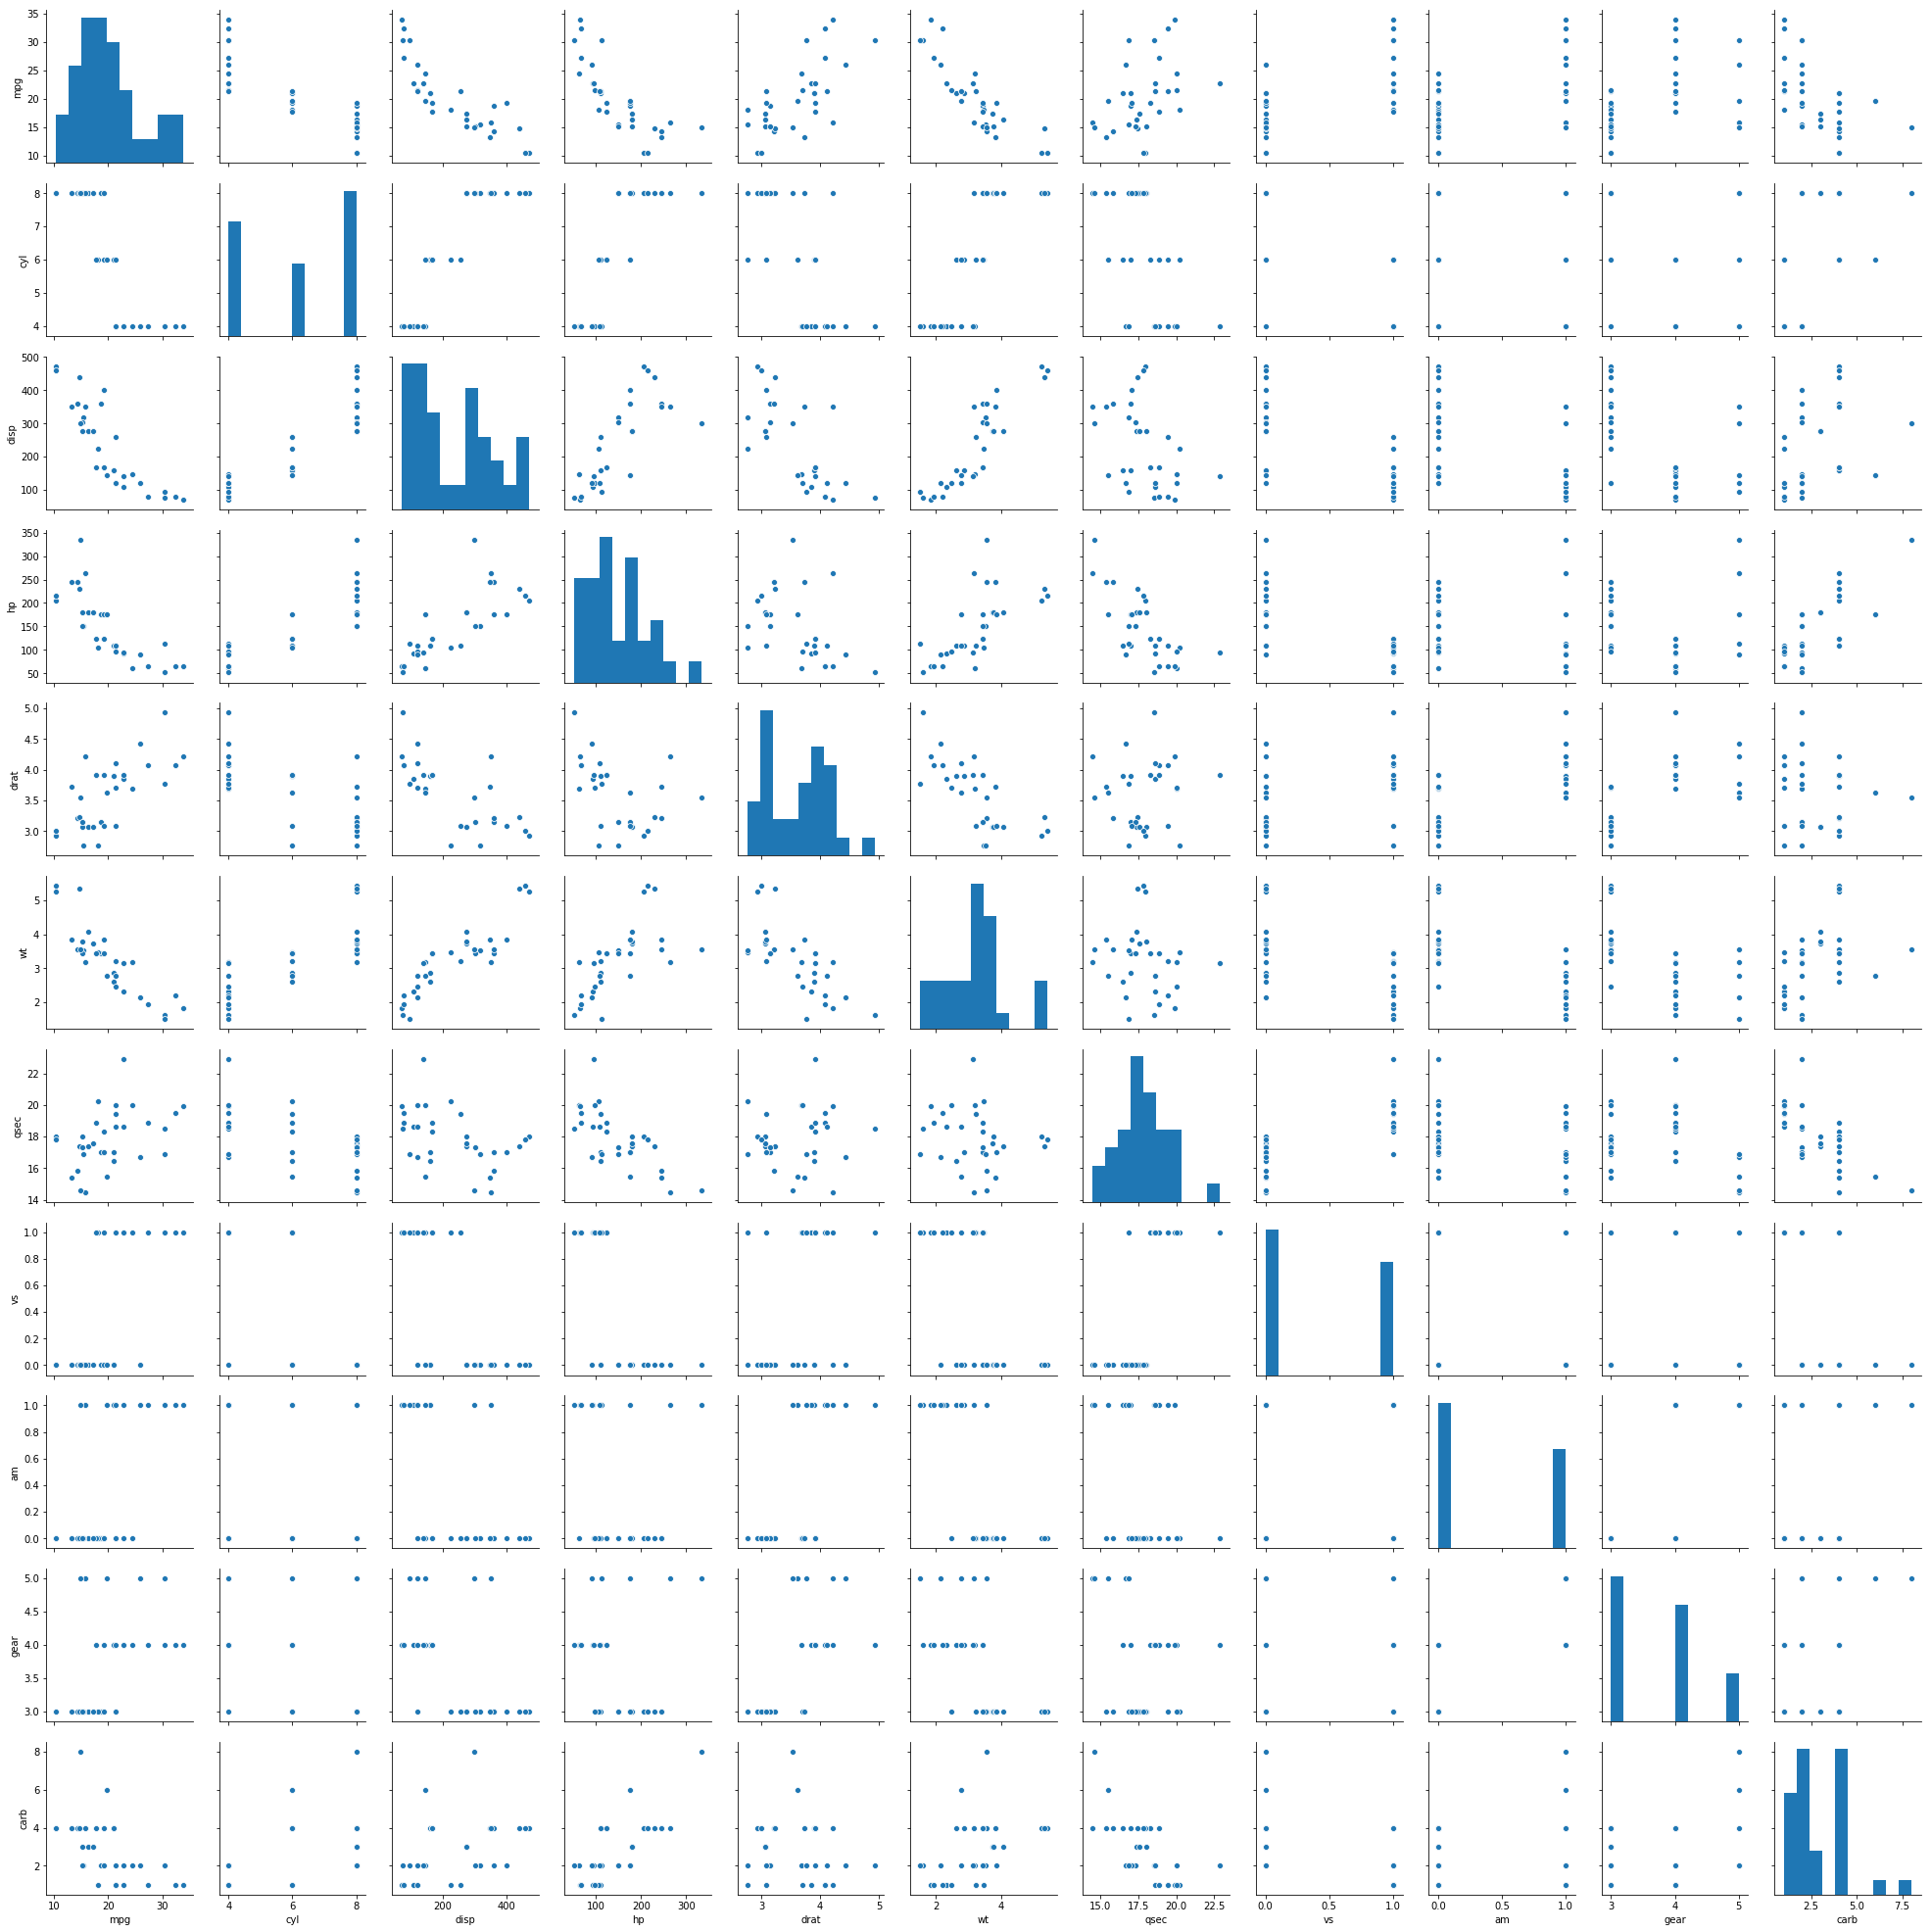

In [6]:
sns.pairplot(mtcars)

Seeing the Pairwise Plot to determine the basic relationship among variables. Complememted with the correlation plot this becomes very useful

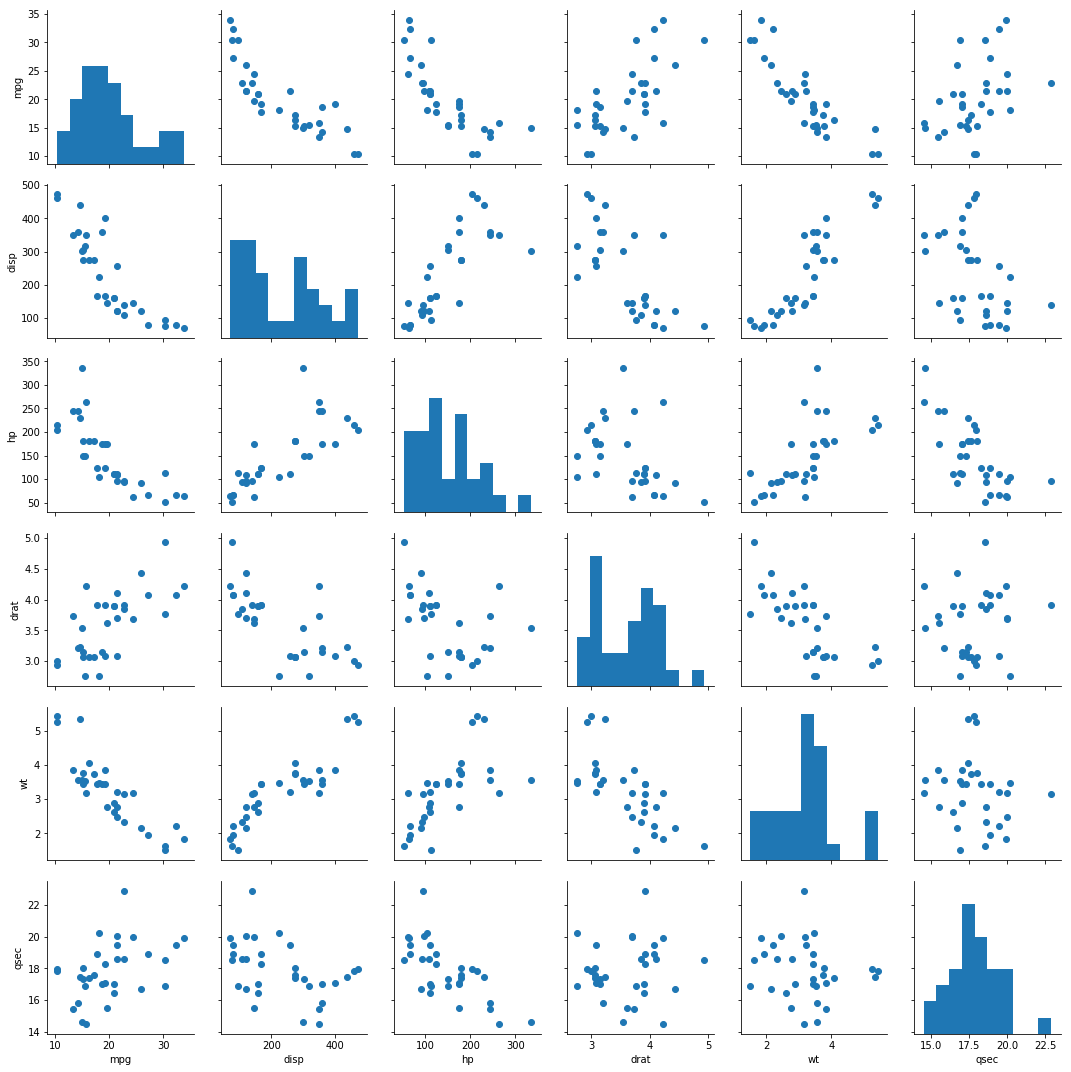

In [8]:
g = sns.PairGrid(mtcars[[ 'mpg',  'disp', 'hp', 'drat', 'wt','qsec']])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

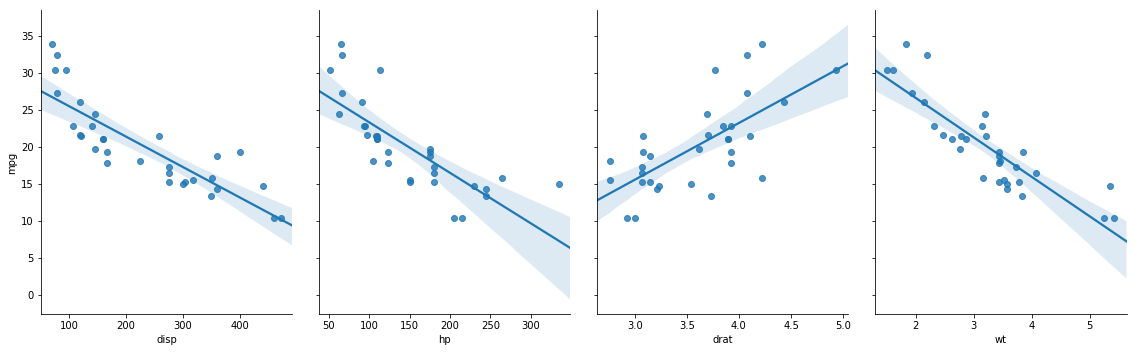

In [9]:
sns.pairplot(mtcars, x_vars=['disp', 'hp', 'drat', 'wt'], y_vars=["mpg"],
             height=5, aspect=.8, kind="reg");

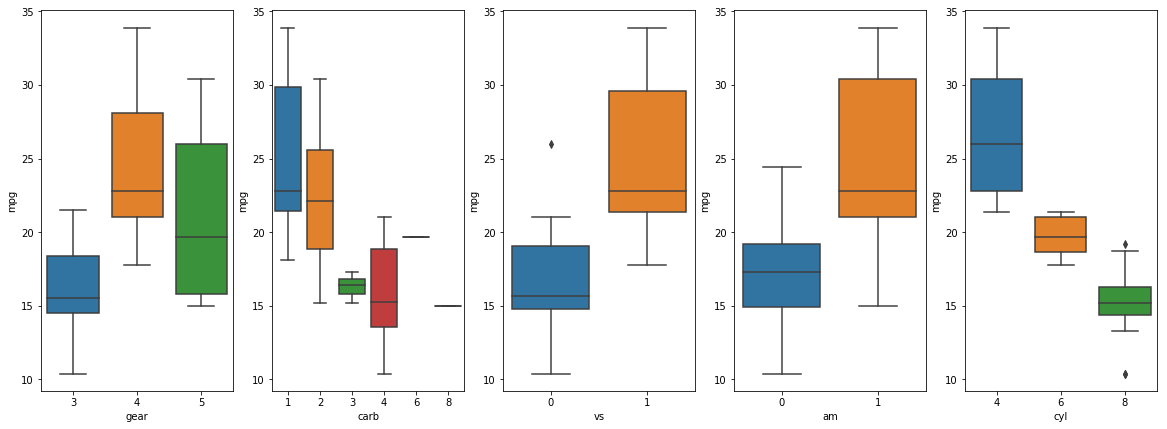

In [16]:
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,7))
sns.boxplot(x="gear", y="mpg", data=mtcars,ax=ax1)
sns.boxplot(x="carb", y="mpg", data=mtcars,ax=ax2)
sns.boxplot(x="vs", y="mpg", data=mtcars,ax=ax3)
sns.boxplot(x="am", y="mpg", data=mtcars,ax=ax4)
sns.boxplot(x="cyl", y="mpg", data=mtcars,ax=ax5)

The correlation matrix is very useful in Linear Regression. We know that if there is correlation between the varibles then then beta values do not make sense. We must choose only one of the highly correlated variables.

In [15]:
## Correlation Matrix
corr = mtcars.corr()
#corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

,mpg,disp,hp,drat,wt,qsec
mpg,1,-0.85,-0.78,0.68,-0.87,0.42
disp,-0.85,1,0.79,-0.71,0.89,-0.43
hp,-0.78,0.79,1,-0.45,0.66,-0.71
drat,0.68,-0.71,-0.45,1,-0.71,0.091
wt,-0.87,0.89,0.66,-0.71,1,-0.17
qsec,0.42,-0.43,-0.71,0.091,-0.17,1


In [85]:
## Declaring the variables
iv=mtcars[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am','gear', 'carb']]
dv=mtcars['mpg']


In [86]:
## Creating the dummy variables 
iv=pd.get_dummies(iv)
iv=iv.drop(['cyl_4', 'vs_0','am_0','gear_3','carb_1','carb_2','carb_3','carb_4','carb_6',
           'carb_8','hp','wt'], axis=1)
iv

,disp,drat,qsec,cyl_6,cyl_8,vs_1,am_1,gear_4,gear_5
0,160.0,3.90,16.46,1,0,0,1,1,0
1,160.0,3.90,17.02,1,0,0,1,1,0
2,108.0,3.85,18.61,0,0,1,1,1,0
3,258.0,3.08,19.44,1,0,1,0,0,0
4,360.0,3.15,17.02,0,1,0,0,0,0
5,225.0,2.76,20.22,1,0,1,0,0,0
6,360.0,3.21,15.84,0,1,0,0,0,0
7,146.7,3.69,20.00,0,0,1,0,1,0
8,140.8,3.92,22.90,0,0,1,0,1,0
9,167.6,3.92,18.30,1,0,1,0,1,0


The pandas function of creating the dummy variables is the most simplest one. Far more easier than sklearn. Please note the dropping of columns to avoid dummy variable trap

In [68]:
## Creating the dummy variables 

iv=iv.drop(['cyl_4', 'vs_0','am_0','gear_3','carb_1','carb_2','carb_3','carb_4','carb_6',
           'carb_8','hp','wt'], axis=1)

In [19]:
## Dividing the Dataset into Test and Train
from sklearn.model_selection import train_test_split
iv_train,iv_test,dv_train,dv_test=train_test_split(iv,dv,test_size=1/4,random_state=0)

In [20]:
## Implementing Linear Regression
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(iv_train,dv_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
## Seeing the result of Linear Regression
import statsmodels.api as sm
X2 = sm.add_constant(iv_train)
est = sm.OLS(dv_train,X2)
est2 = est.fit()
print(est2.summary())

C:\Users\Sourav Banerjee\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     6.238
Date:                Fri, 12 Jul 2019   Prob (F-statistic):            0.00131
Time:                        06:18:11   Log-Likelihood:                -57.941
No. Observations:                  24   AIC:                             135.9
Df Residuals:                      14   BIC:                             147.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.7974     27.914      0.673      0.5

In [22]:
y_pred=regressor.predict(iv_test)

In [23]:
## Seeing the Predictions
y_pred

array([16.87086511, 16.21629092, 19.66289471, 28.4679569 , 13.22551221,
       12.66853691, 16.96561285, 23.25460881])

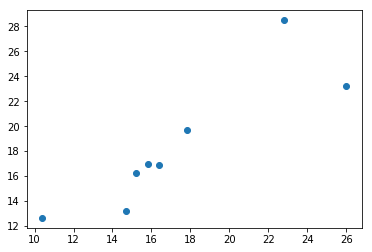

In [89]:
plt.scatter(dv_test,y_pred)

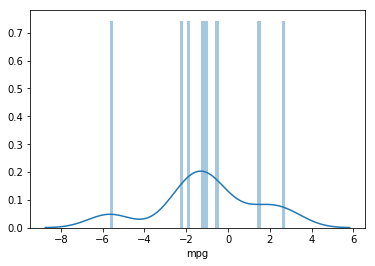

In [90]:
sns.distplot((dv_test-y_pred),bins=50);

In [91]:
from sklearn import metrics

In [92]:
print('MAE:', metrics.mean_absolute_error(dv_test,y_pred))
print('MSE:', metrics.mean_squared_error(dv_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dv_test,y_pred)))

MAE: 2.0840045464567067
MSE: 6.633359170049542
RMSE: 2.575530852086525
